In [ ]:
#############################################################################
####################Import all packages######################################
#############################################################################
import os
import random
import numpy as np
#import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
#import pandas_profiling as pp
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'
# Set working directory
#############################################################################
# Make Jupyter Notebook show ALL output of a cell, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
os.getcwd()

In [3]:
#  READING IN DATA
# CLEANED DATA
postflight_1 = pd.read_pickle('../new_data/final_data_USE_THIS_ONE/postflight_1_clean.pkl')

# FILTERED DATA
#post_filt = pd.read_pickle('../new_data/final_data_USE_THIS_ONE/postflight1_filtered.pkl')
#postflight1_pressure = pd.read_pickle('../new_data/final_data_USE_THIS_ONE/postflight1_pressure_below_1500.pkl')



In [4]:
## Remove all unncessary columns
cols_to_keep = ['timeStamp',
                'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue',
                'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2',
                'Pressure_LateAccess']

#pre_and_flight = pre_and_flight[cols_to_keep]
postflight_1 = postflight_1[cols_to_keep]
#extra = extra[cols_to_keep]

In [5]:
# DFs contain negligible amount of missing values (NAs), just drop them
#import missingno as msno
#msno.matrix(postflight_1)
#pre_and_flight.dropna(inplace=True)
#postflight_1.dropna(inplace=True)
#extra.dropna(inplace=True)

In [6]:
postflight_1.reset_index(inplace=True)

In [7]:
# Check the data range of the final timestamps
#pre_and_flight.timeStamp.min()
#pre_and_flight.timeStamp.max()
postflight_1.timeStamp.min()
postflight_1.timeStamp.max()
#postflight_2.timeStamp.min()
#postflight_2.timeStamp.max()

#extra.timeStamp.min()
#extra.timeStamp.max()


Timestamp('2019-03-11 11:52:55')

Timestamp('2019-03-14 18:53:49')

In [8]:
#date_diff = pd.to_datetime('2019-03-11  13:20:00') - pd.to_datetime('2000-01-01 14:30:02')
#postflight_1.timeStamp = postflight_1.timeStamp + date_diff

postflight_1['ph_rolling'] = postflight_1.Exp0_PhValue.rolling(100).mean()

In [14]:
postflight_1.Pressure_LateAccess.min()
post_filt.Pressure_LateAccess.min()

716.1

952.3

In [16]:
postflight_1

index           timeStamp  Exp0_OxygenTemp  Exp0_OxygenpercentO2  Exp0_PhValue  Exp1_OxygenTemp  Exp1_OxygenpercentO2  Pressure_LateAccess  ph_rolling
0      15600 2019-03-11 11:52:55            0.000                 0.000         0.000            0.000                 0.000                716.1         NaN
1      15601 2019-03-11 11:53:01           14.319                 9.880         0.000           12.475                 5.796                716.1         NaN
2      15602 2019-03-11 11:53:05           14.314                 8.315         6.924           12.477                 4.949                716.3         NaN
3      15603 2019-03-11 11:53:11           14.314                 8.334         6.924           12.485                 4.940                716.6         NaN
4      15604 2019-03-11 11:53:17           14.316                 8.343         6.925           12.485                 4.932                716.6         NaN
5      15605 2019-03-11 11:53:23           14.316                 8.347         6.924           12.490                 4.945                717.0         NaN
6      15606 2019-03-11 11:53:28           14.316                 8.343         6.925           12.493                 4.938                717.4         NaN
7      15607 2019-03-11 11:53:35           14.309                 8.352         6.925           12.498                 4.945                717.9         NaN
8      15608 2019-03-11 11:53:41           14.316                 8.323         6.926           12.503                 4.934                717.8         NaN
9      15609 2019-03-11 11:53:46           14.311                 8.343         6.926           12.503                 4.924                718.1         NaN
10     15610 2019-03-11 11:53:52           14.309                 8.351         6.927           12.506                 4.921                718.5         NaN
11     15611 2019-03-11 11:53:57           14.309                 8.357         6.927           12.506                 4.923                718.6         NaN
12     15612 2019-03-11 11:54:02           14.316                 8.369         6.927           12.509                 4.929                719.0         NaN
13     15613 2019-03-11 11:54:08           14.311                 8.360         6.928           12.527                 4.917                719.2         NaN
14     15614 2019-03-11 11:54:13           14.311                 8.369         6.929           12.532                 4.915                719.5         NaN
15     15615 2019-03-11 11:54:20           14.311                 8.373         6.929           12.537                 4.916                719.7         NaN
16     15616 2019-03-11 11:54:25           14.309                 8.376         6.930           12.555                 4.906                720.0         NaN
17     15617 2019-03-11 11:54:31           14.314                 8.381         6.931           12.561                 4.905                720.2         NaN
18     15618 2019-03-11 11:54:36           14.311                 8.385         6.930           12.563                 4.897                720.4         NaN
19     15619 2019-03-11 11:54:41           14.314                 8.384         6.932           12.584                 4.907                720.5         NaN
20     15620 2019-03-11 11:54:46           14.314                 8.398         6.933           12.592                 4.892                721.0         NaN
21      3261 2019-03-11 11:54:51           14.316                 8.409         6.933           12.618                 4.890                721.1         NaN
22      3262 2019-03-11 11:54:56           14.319                 8.413         6.935           12.625                 4.884                721.4         NaN
23      3263 2019-03-11 11:55:01           14.322                 8.420         6.936           12.633                 4.882                721.4         NaN
24      3264 2019-03-11 11:55:06           14.322        

In [15]:
# Filter for proper plotting
post_filt = postflight_1[(postflight_1.Pressure_LateAccess < 1300) & (postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp1_OxygenpercentO2 < 50)  & (postflight_1.Exp1_OxygenpercentO2 > 0) & (postflight_1.ph_rolling < 20) & (postflight_1.ph_rolling > 0)]

In [ ]:
import numpy as np
import matplotlib as mpl
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot( data=post_filt   
                   , x = 'timeStamp'
                   , y =  'Exp0_OxygenTemp'
                )
         

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')

plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Water temperature \n [C°]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Water temperature [Exp0_Flight module]', fontsize='6', fontweight='bold')

fig.set_size_inches(width, height)
fig.savefig('../output/NEW_postflight/Exp0_OxygenTemp.png', dpi=1000)


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot(
            data=post_filt,
            x = 'timeStamp',
             y = 'Exp1_OxygenTemp'
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Water temperature \n [C°]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Water temperature [Exp1_Flight module]', fontsize='6', fontweight='bold')

#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)

fig.savefig('../output//NEW_postflight/Water_temperature_Exp1_Flight_module.png', dpi=1000)
#plt.show()

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot(
            data=post_filt,
            x = 'timeStamp',
             y = 'Exp1_OxygenpercentO2'
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Oxygen content \n [%]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Oxygen content [Exp1_Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('../output//NEW_postflight/Oxygen_content_Exp1_Flight_module.png', dpi=1000)


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot(
            data=post_filt,
            x = 'timeStamp',
             y = 'Exp0_OxygenpercentO2'
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Oxygen content \n [%]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Oxygen content [Exp0_Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('../output//NEW_postflight/Oxygen_content_Exp0_Flight_module.png', dpi=1000)


In [ ]:
postflight_1.columns

#Water temperature [Exp0_Flight module]
#Water temperature [Exp1_Flight module]
#Oxygen content [Exp0_Flight module]
#Oxygen content [Exp1_Flight module]
#pH Value [Exp0_Flight module]
#Ambient Pressure [Flight module]

(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ,
        737132.5]), <a list of 7 Text xticklabel objects>)

Text(0, 0.5, 'Ambient Pressure [Flight module] \n [hPa]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Ambient Pressure [Flight module]')

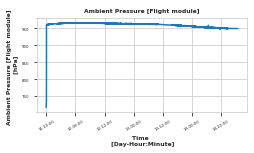

In [18]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot(
            data= postflight_1[postflight_1.Pressure_LateAccess < 1500],
            x = 'timeStamp',
            y = 'Pressure_LateAccess')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Ambient Pressure [Flight module] \n [hPa]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Ambient Pressure [Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('../output//NEW_postflight/Ambient_Pressure_Flight_module.png', dpi=1000)




In [21]:
#post_filt.to_csv('../new_data/final_data_USE_THIS_ONE/postflight1_filtered.csv')
#postflight_1[postflight_1.Pressure_LateAccess < 1500].to_csv('../new_data/final_data_USE_THIS_ONE/postflight1_pressure_below_1500.csv')
post_filt.to_pickle('../new_data/final_data_USE_THIS_ONE/postflight1_filtered.pkl')
postflight_1[postflight_1.Pressure_LateAccess < 1500].to_pickle('../new_data/final_data_USE_THIS_ONE/postflight1_pressure_below_1500.pkl')

In [ ]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot(
            data=post_filt,
            x = 'timeStamp',
            y = 'ph_rolling')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("pH Value", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('pH Value [Exp0_Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('../output//NEW_postflight/Exp0_PhValue_Flight_module.png', dpi=1000)


